mu1/sigma1/mu2/sigma2/mu3/sigma3:
[ 7.25546201  1.80622821 11.68190568  1.15283585 21.96863781  0.59662222]
Fehler:
[ 898.90848607 1905.115413      3.70545155    6.40265904    9.07970045
    9.2113808 ]


Text(0.5, 0, '10^20')

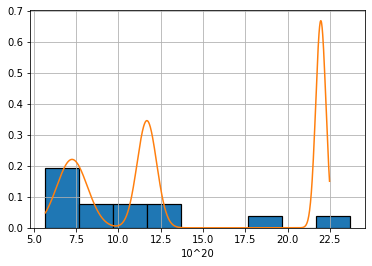

In [10]:
#Benotigte Madule(inkl. in Anaconda)
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random
from scipy.stats import norm

import sys

#1. U;t1;t2;x ersetzen und ihre fehler
#2. anzahl an gaußfunktionen wählen
#3. Startwerte beta0 richtig wählen(vorallem die müs)
#4. stepsize bzw binnabstand fürs histogram


def gau(x,m,o):
    return (1/np.sqrt(2*np.pi*o**2))*np.exp(-(x-m)**2/(o**2)*2)

def func(B, x):
    [m1,o1,m2,o2,m3,o3]=B
    return gau(x,m1,o1)+gau(x,m2,o2)+gau(x,m3,o3)
    
def fit(x,y,x_err,y_err):
    #definerit die zu fittene Funktion,in B sind die Parameter und x ist die unabhängige
    model = Model(func)

    #Überprüft welche Fehler angegeben wurden
    if (np.isnan(x_err).any() and np.isnan(y_err).any()):
        data = RealData(x, y)
    elif np.isnan(x_err).any():
        data = RealData(x, y, sy=y_err)
    elif np.isnan(y_err).any():
        data = RealData(x, y, sx=x_err)
    else:
        data = RealData(x, y, sx=x_err, sy=y_err)
    
    #Führt den Fit aus, beta0 sind die Startwerte
    odr = ODR(data, model, beta0=[7., 1.,12., 1.,22., 1.])
    out = odr.run()
    #out.beta beinhaltet die Parameter
    #out.sd_beta beinhaltet die Fehler der Parameter
    return out

#Spannung
U=np.array([496,494,493,493,493,492,491,491,495,497,497,497,497])

U_fehler=1
U_err=np.full(len(U),U_fehler)

#Zeit:
t2=np.array([3.59,
             2.68,
             5.74,
             4.17,
             2.38,
            3.57,
            3.53,
            7.72,
            3.12,
            2.09,
            1.49,
            2.03,
            2.03])
t1=np.array([22.16,
             22.05,
             5.24,
             32.58,
             24.69,
            32.95,
            33.94,
            14.92,
            34.78,
            83.15,
            27.44,
            54.09,
            50.33])


t_fehler=0.1
t_err=np.full(len(t1),t_fehler)
t1_err=t2_err=t_err
if len(U)!=len(t1):
    U=np.full(len(t1),491)
    U_err=np.full(len(U),U_fehler)


#Strecke; x ist gemessen durchs Mikroskop; s ist umgerechnet in den Realen wert
x=np.array([1,1])
x=np.full(len(t1),2)

x_fehler=0.1
x_err=np.full(len(x),x_fehler)

#Position
z=1.875 #zoom

z_err=1.875*0.01
s=x/z*10**(-3)
s_err=np.sqrt((1/z*10**(-4)*x_err)**2+
              (x*10**(-4)*z_err/z**2)**2)

#Geschwindigkeit
v1=s/t1
v1_err=np.sqrt((s_err/t1)**2+(s*t1_err/t1**2)**2)
v2=s/t2
v2_err=np.sqrt((s_err/t2)**2+(s*t2_err/t2**2)**2)


eta=1.81*10**(-5)
d=6*10**(-3)
poel=875.3
pl=1.29
p=874
p_err=0
g=9.81

Q=(v1+v2)*np.sqrt(v1)/U*eta**(3/2)*18*np.pi*d/np.sqrt(2*p*g)
q=Q
Q=Q*10**19
#Als BSP
#Q=np.array([1,2,2,2,3,3,3,3,3,4,6,6,6,6,6,8,9,9,9,9,10]);


Q_err=9*np.pi*d*eta**(3/2)/np.sqrt(g*p)*np.sqrt(((3*v1+v2)/(U*np.sqrt(2*v1))*v1_err)**2+
                                                (np.sqrt(2*v1)/U*v2_err)**2+
                                                (np.sqrt(2*v1)*(v1+v2)/U**2*U_err)**2)
#Als BSP:
Q_err=np.nan




#Anpassen für schönnes Histogramm
stepsize=2

#Histogramm erstellen
bins=np.arange(min(Q)-stepsize/2,max(Q)+stepsize/1.5,stepsize)
[n,binsh,ka]=plt.hist(Q,bins=bins,density=True,edgecolor='black', linewidth=1.2)


#Fit erstellen
xf=bins+stepsize/2
xf=xf[:-1]
yf=n

out=fit(xf,yf,np.nan,np.nan)

#Fit-Funktionswerte Berechnen
x_p=np.linspace(bins[0],max(Q),1000)
y_p=func(out.beta,x_p)

#Plotten
f=plt.plot(x_p,y_p)
plt.grid()


#Für die Korektur:
#welches eta? 
r=np.sqrt(9*eta*v1/(2*p*g))
#r_err überprüfen
r_err=1/(2*np.sqrt(9*eta*v1/(2*p*g)))*9*eta/(2*p*g)*v1_err
#xk=1/(p*r)
#yk=Q**(2/3)

#xk_err=np.sqrt((r_err/(r**2*p))**2+(p_err/(p**2*r))**2)
#yk_err=2/(3*Q**(1/3))*Q_err



#def func(B, x):
#    [b,y0]=B
#    return y0*(1+b*x)

#out=fit(xk,yk,np.nan,yk_err)



print("mu1/sigma1/mu2/sigma2/mu3/sigma3:")
print(out.beta)
print("Fehler:")
print(out.sd_beta)
plt.xlabel("10^20")

In [12]:
q

array([9.63553498e-19, 1.25394602e-18, 2.24841232e-18, 6.68154822e-19,
       1.30710990e-18, 7.64088529e-19, 7.59957135e-19, 7.20366907e-19,
       8.31599862e-19, 7.52275198e-19, 1.88911751e-18, 9.71894494e-19,
       1.01026702e-18])

In [11]:
n

array([0.19230769, 0.07692308, 0.07692308, 0.07692308, 0.        ,
       0.        , 0.03846154, 0.        , 0.03846154])

In [13]:
xf[:-1]

array([ 6.68154822,  8.68154822, 10.68154822, 12.68154822, 14.68154822,
       16.68154822, 18.68154822, 20.68154822])

In [3]:
len(t2)

13